In [86]:
import pandas as pd 

In [87]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#memeriksa data ada yang kosong atau null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#memeriksa data apa ada yang terduplkikat
df.duplicated().sum()

723

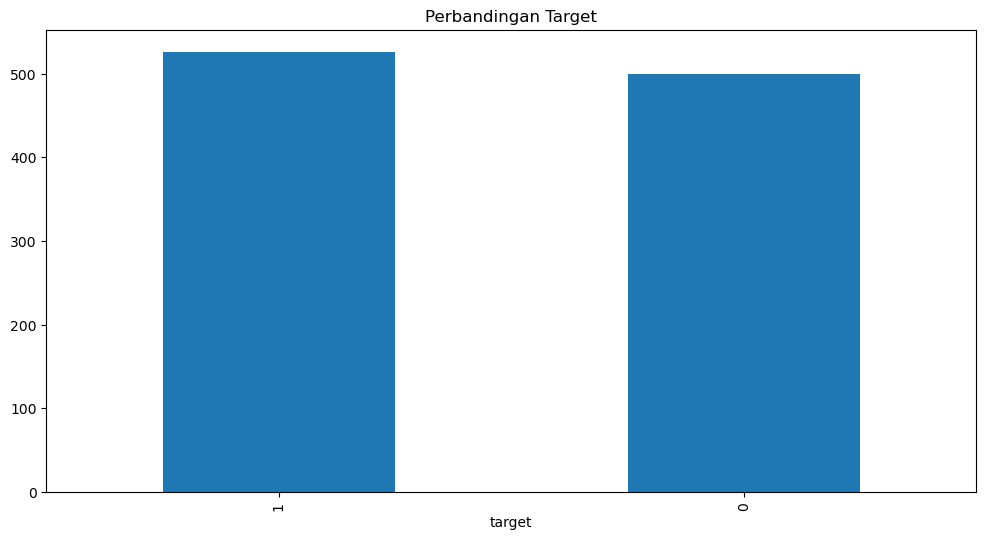

In [7]:
import matplotlib.pyplot as plt
class_count = df['target'].value_counts()
plt.figure(figsize=(12,6))
class_count.plot(kind='bar')
plt.title('Perbandingan Target')
plt.xlabel('target')
plt.show()

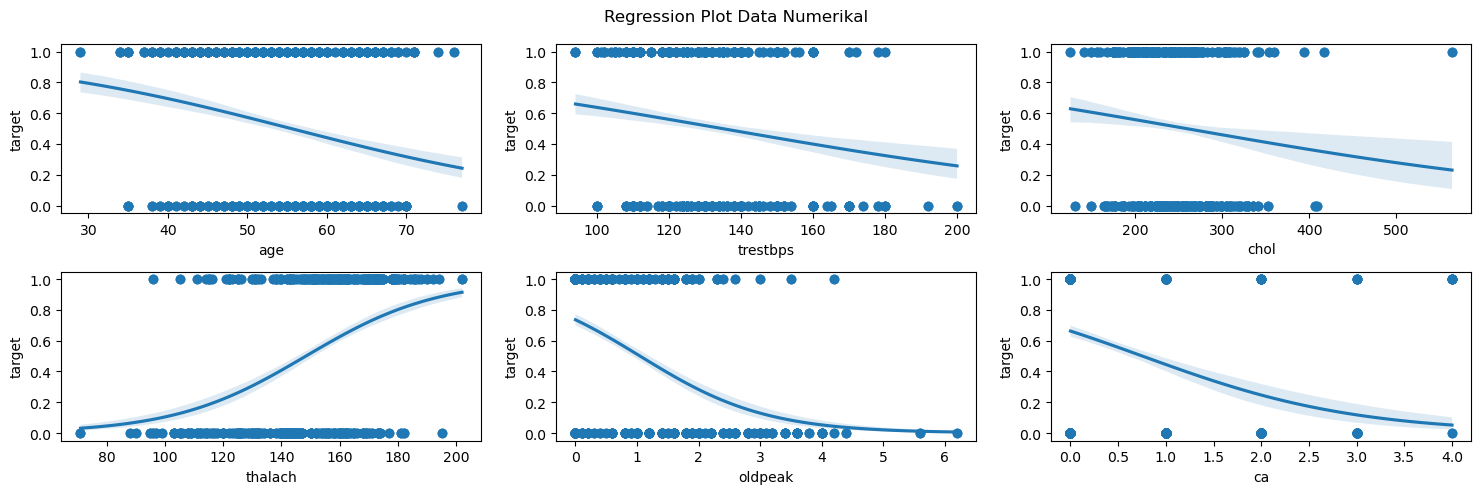

In [8]:
#melihat grafik regresi pada data numerikal terhadap target
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=False)
plt.suptitle('Regression Plot Data Numerikal')
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
numeric_coloumns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for i, coloumn in enumerate(numeric_coloumns) :
    sns.regplot(x=coloumn, y='target', data = df, logistic = True, ax=axes[i])

plt.tight_layout()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

=== Skewness ===
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
ca = 1.2611886429097716


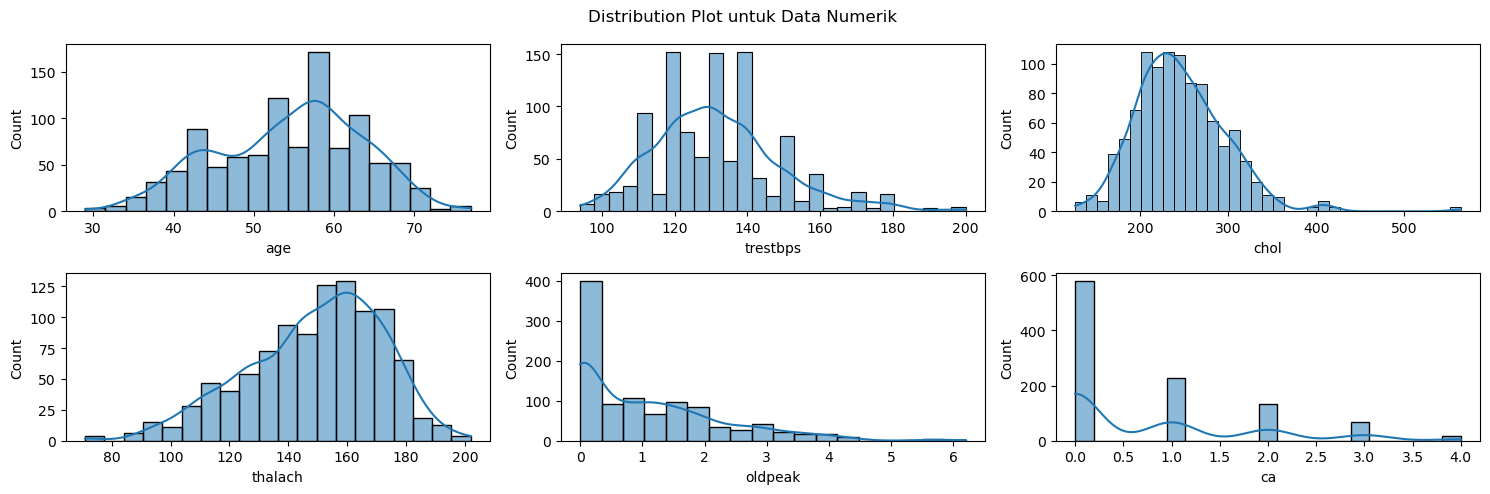

In [9]:
#melihat persebaran data numerikal
fig, axes = plt.subplots(2,3, figsize=(15,5), sharey=False)
plt.suptitle("Distribution Plot untuk Data Numerik ")
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = df[numeric_coloumns].skew()

for i, coloumn in enumerate(numeric_coloumns):
    sns.histplot(x=coloumn, data=df, ax = axes[i], kde='True')

print('=== Skewness ===')
for coloumn, skew in zip(numeric_coloumns, skewness):
    print(f'{coloumn} = {skew}')

plt.tight_layout()

In [10]:
#Data Tranformation 
#melakukan standarisasi pada data numerikal

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
numeric_df = df[numeric_coloumns]

numeric_scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns = scaler.get_feature_names_out())
numeric_scaled_df

,age,trestbps,chol,thalach,oldpeak,ca
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1.209221
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.731971
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.731971
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.238625
4,0.834359,0.364875,0.930822,-1.874977,0.705408,2.179817
...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,-0.731971
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0.238625
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0.238625
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,-0.731971


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

=== Skewness ===
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
ca = 1.2611886429097716


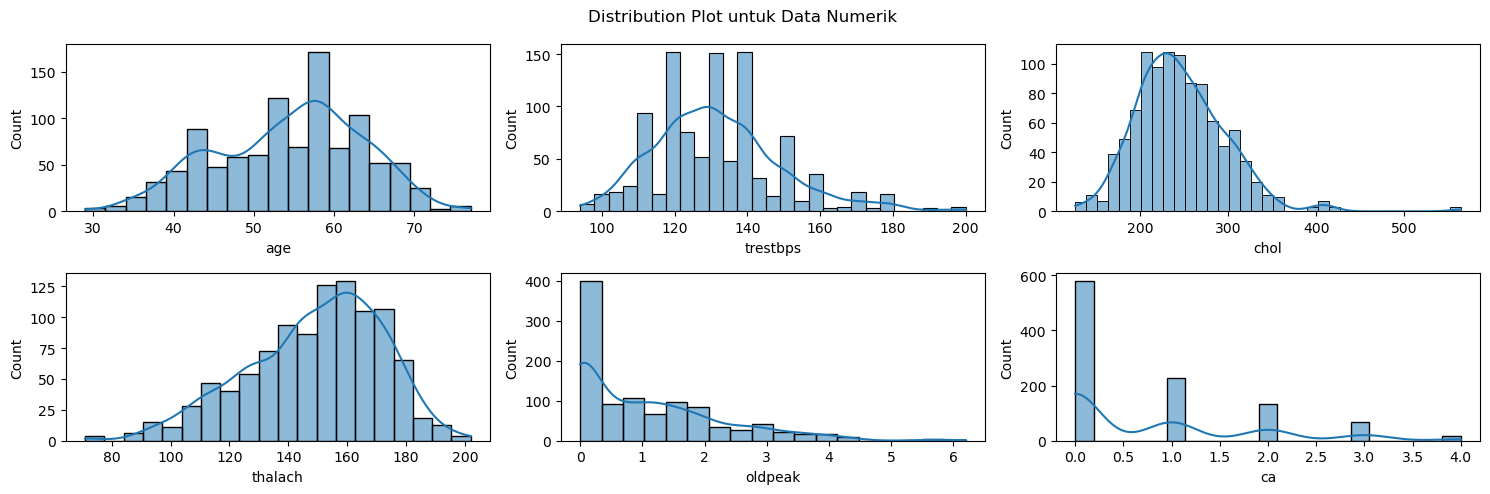

In [11]:
#melihat persebaran data numerikal
fig, axes = plt.subplots(2,3, figsize=(15,5), sharey=False)
plt.suptitle("Distribution Plot untuk Data Numerik ")
plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = df[numeric_coloumns].skew()

for i, coloumn in enumerate(numeric_coloumns):
    sns.histplot(x=coloumn, data=df, ax = axes[i], kde='True')

print('=== Skewness ===')
for coloumn, skew in zip(numeric_coloumns, skewness):
    print(f'{coloumn} = {skew}')

plt.tight_layout()

In [12]:
#melakukan encoding pada data kategorikal
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['cp', 'restecg', 'slope', 'thal']
ohc = OneHotEncoder(sparse_output=False, drop=None)

dummies_df = pd.DataFrame(ohc.fit_transform(df[nominal_columns]), columns = ohc.get_feature_names_out())
dummies_df

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1021,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1022,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1023,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
#menyatukan kembali data numerikal dan kategorikal
clean_data = pd.concat([numeric_scaled_df, dummies_df, df[['sex', 'fbs', 'exang', 'target']]], axis = 1)
clean_data

,age,trestbps,chol,thalach,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,...,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,sex,fbs,exang,target
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,1.209221,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.731971,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.731971,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0.238625,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,2.179817,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,-0.731971,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1,1
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0.238625,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0.238625,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,-0.731971,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,1


In [14]:
#membangun model klasifikasi
#membagi dataset menjadi data test dan validation

from sklearn.model_selection import train_test_split

X = clean_data.drop(columns = 'target')
y = clean_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)
X_train_lengkap = X_train.copy()
y_train_lengkap = y_train.copy()


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

#check the shapes of the Resulting sets
print("Train :",  X_train.shape, y_train.shape)
print("Validation : ", X_valid.shape, y_valid.shape)
print("Testing :", X_test.shape, y_test.shape)



Train : (656, 23) (656,)
Validation :  (164, 23) (164,)
Testing : (205, 23) (205,)


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 783 to 347
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        656 non-null    float64
 1   trestbps   656 non-null    float64
 2   chol       656 non-null    float64
 3   thalach    656 non-null    float64
 4   oldpeak    656 non-null    float64
 5   ca         656 non-null    float64
 6   cp_0       656 non-null    float64
 7   cp_1       656 non-null    float64
 8   cp_2       656 non-null    float64
 9   cp_3       656 non-null    float64
 10  restecg_0  656 non-null    float64
 11  restecg_1  656 non-null    float64
 12  restecg_2  656 non-null    float64
 13  slope_0    656 non-null    float64
 14  slope_1    656 non-null    float64
 15  slope_2    656 non-null    float64
 16  thal_0     656 non-null    float64
 17  thal_1     656 non-null    float64
 18  thal_2     656 non-null    float64
 19  thal_3     656 non-null    float64
 20  sex        65

In [17]:
#memilih algoritma klasifikasi yang sesuai

#dari data yang kita peroleh menggunakkan LazyClassifier, kita menemukan algoritma klasifikasi dengan nilai akurasi serta waktu yang diperlukan dalam melatih
#memilih 3 klasifikasi Extra Tree Classifier, Random Forest Classifier,  dan Decision Tree Classifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [18]:
#Algoritma Extra Trees Classifier

Berikut beberapa alasan yang mendasari saya untuk memilih algoritma ExtraTreesClassifier untuk menyelesaikan masalah klasifikasi pada dataset yang saya miliki:

Kemampuan menangani data multi-class: ExtraTreesClassifier merupakan algoritma ensemble yang didasarkan pada Random Forest. Algoritma ini mampu menangani data multi-class dengan baik.

Ketahanan terhadap overfitting: ExtraTreesClassifier memiliki mekanisme bawaan untuk mencegah overfitting, yaitu dengan menggunakan fitur sub-sampling dan random split pada saat membangun pohon keputusan. Hal ini penting untuk memastikan model yang dihasilkan memiliki kinerja yang baik pada data baru yang belum pernah dilihat sebelumnya.

Kemampuan menangani imbalance data: ExtraTreesClassifier dapat menangani imbalance data dengan baik dengan menggunakan teknik seperti sampling ulang atau cost-sensitive learning.

In [19]:
#Membangun model klasifikasi Extra Trees Classifier
#menginisialisasi extra trees classifier
modelETC = ExtraTreesClassifier()

#melatih model menggunakkan data training
modelETC.fit(X_train, y_train)

#mempredikis label pada data testing
y_pred = modelETC.predict(X_test)

#mengevaluasi model menggunakkan classification report, dan accuracy dan MSE
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
loss = mean_squared_error(y_test, y_pred)

#menampilkan hasil evaluasi classification report dan accuracy 
print('Classification Report\n', report)
print('Accuracy :', accuracy)
print('Loss :', loss)




Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Accuracy : 0.9804878048780488
Loss : 0.01951219512195122


In [20]:
#Mengevaluasi model yang dihasilkan dengan data validasi

Untuk tahapan ini saya menggunakan metrik evaluasi precision, recall, f1-score, akurasi serta nilai loss.

Precision menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.

Recall atau sensitivity: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Dengan recall kita bisa mengetahui seberapa banyak model kita memprediksi orang yang terkena dan terdeteksi dibandingkan dengan orang yang tidak terkena dan tidak terdeteksi begitu.

loss adalah metrik yang menggambarkan seberapa tinggi error atau loss yang dilakukan machine learning dengan nilai output berupa probabilitas.

In [21]:
#prediksi label data validasi
y_pred_valid = modelETC.predict(X_valid)

#mengevaluasi model dengan menggunakkan classification report, accuracy dan MSE
report = classification_report(y_valid, y_pred_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
loss = mean_squared_error(y_valid, y_pred_valid)

#menampilkan hasil evaluasi classification report dan accuracy
print('Classification Report\n', report)
print('Accuracy :', accuracy)
print('Loss :', loss)


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        80
           1       0.97      1.00      0.98        84

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164

Accuracy : 0.9817073170731707
Loss : 0.018292682926829267


In [22]:
#Melakukan cross validation pada model yang telah dibangun
def cross_validate(model):
    Model = model
    recall = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='recall')
    precision = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='precision')
    f1 = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='f1')
    accuracy = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='accuracy')

    print(f'CV Accuracy Score: {accuracy}')
    print(f'CV Precision Score: {precision}')
    print(f'CV Recall Score: {recall}')
    print(f'CV F1 Score: {f1}')
    print()
    print(f'CV Accuracy Mean: {round(accuracy.mean(), 4)}')
    print(f'CV Precision Mean: {round(precision.mean(), 4)}')
    print(f'CV Recall Mean: {round(recall.mean(), 4)}')
    print(f'CV F1 Mean: {round(f1.mean(), 4)}')

cross_validate(modelETC)



CV Accuracy Score: [0.96341463 0.99390244 0.99390244 0.97560976 1.        ]
CV Precision Score: [0.95348837 0.97674419 0.97674419 1.         1.        ]
CV Recall Score: [0.97619048 1.         0.98809524 0.96428571 1.        ]
CV F1 Score: [0.96470588 0.99408284 0.99408284 0.97560976 1.        ]

CV Accuracy Mean: 0.9854
CV Precision Mean: 0.9814
CV Recall Mean: 0.9857
CV F1 Mean: 0.9857


Dalam konteks kode saya, cv=5 pada fungsi cross_val_score menunjukkan bahwa saya menggunakan teknik cross-validation k-fold dengan k=5. Artinya, dataset akan dibagi menjadi 5 bagian yang sama besar, dan model akan dilatih dan diuji sebanyak 5 kali. Pada setiap iterasi, satu bagian dari data akan digunakan sebagai data pengujian (validation set), sedangkan bagian-bagian lainnya akan digunakan sebagai data pelatihan (training set).

Proses ini berulang sebanyak 5 kali, dengan setiap fold bergantian menjadi validation set. Hasil akhir dari cross-validation ini adalah rata-rata dari hasil evaluasi (seperti accuracy, precision, recall, dan f1-score) dari setiap iterasi. Penggunaan cross-validation dengan k=5 adalah pilihan yang umum karena memberikan keseimbangan antara keandalan evaluasi dan biaya komputasi yang wajar.

Dengan menggunakan cross-validation, saya dapat mendapatkan estimasi yang lebih akurat tentang performa model saya daripada hanya menggunakan satu set data pengujian, karena model dievaluasi pada multiple subsets of data yang berbeda. Hal ini membantu dalam menghindari overfitting pada data pengujian tunggal dan memberikan gambaran yang lebih baik tentang seberapa baik model berperforma secara umum.

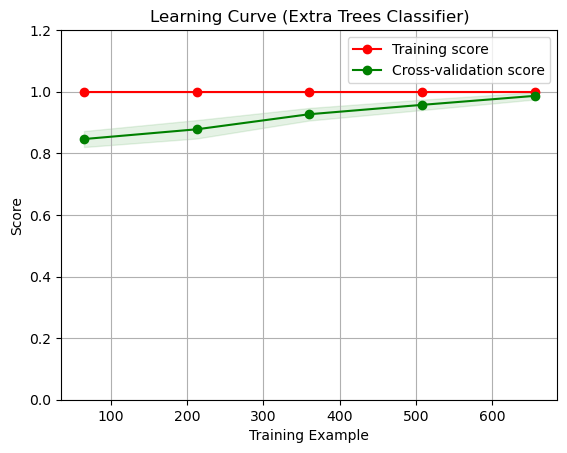

In [23]:
#Learning curve model selama pelatihan
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Example")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.ylim(0, 1.2)  # Set the y-axis limits from 0 to 1

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(modelETC, "Learning Curve (Extra Trees Classifier)", X_train_lengkap, y_train_lengkap, cv=5)
plt.show()

Learning curve digunakan untuk memahami bagaimana performa model machine learning berubah seiring dengan penambahan data pelatihan.

Grafik ini terdiri dari dua kurva utama:

Kurva Training Score (Training score): Ini adalah skor evaluasi dari model pada data pelatihan. Ini memberikan gambaran tentang seberapa baik model mempelajari pola-pola dari data pelatihan seiring dengan penambahan jumlah data.

Kurva Cross-validation Score (Cross-validation score): Ini adalah skor evaluasi model saat diuji pada data validasi (cross-validation) selama proses cross-validation. Ini memberikan gambaran tentang seberapa baik model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

Komponen-komponen penting dalam grafik learning curve:

Training examples (jumlah data pelatihan): Jumlah data pada sumbu x menunjukkan berapa banyak data yang digunakan untuk melatih model pada setiap iterasi.
Score (skor evaluasi): Skor evaluasi pada sumbu y mengukur performa model, biasanya dalam bentuk accuracy, precision, recall, atau f1-score.
Training score line (kurva Training score): Kurva ini menunjukkan bagaimana skor evaluasi pada data pelatihan berubah seiring dengan penambahan data. Jika kurva ini naik dan stabil, itu menunjukkan bahwa model mendapat manfaat dari penambahan data.
Cross-validation score line (kurva Cross-validation score): Kurva ini menunjukkan bagaimana skor evaluasi pada data validasi (cross-validation) berubah seiring dengan penambahan data. Tujuannya adalah untuk mengetahui seberapa baik model dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya.
Area shaded: Area di sekitar kedua kurva mewakili standar deviasi dari skor evaluasi. Semakin kecil area shaded, semakin stabil performa model.

In [24]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the specified parameters
grid_search = GridSearchCV(estimator=modelETC, param_grid=param_grid, cv=4, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best parameters
grid_search.fit(X_train_lengkap, y_train_lengkap)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9792682926829268


Saya menggunakan GridSearchCV untuk mencari hyperparameter terbaik untuk model ExtraTreesClassifier (modelETC) menggunakan parameter grid yang saya tentukan. Parameter grid tersebut mencakup beberapa hyperparameter yang akan dioptimalkan oleh GridSearchCV, yaitu:

'n_estimators': Jumlah pohon dalam ensemble. Nilai yang diuji adalah 300, 400, dan 500.
'max_depth': Kedalaman maksimum dari setiap pohon. Nilai yang diuji adalah None (tidak ada batasan kedalaman), 5, dan 10.
'min_samples_split': Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 5, dan 10.
'min_samples_leaf': Jumlah sampel minimum yang diperlukan untuk menjadi simpul daun (leaf node). Nilai yang diuji adalah 1, 2, dan 4.
'bootstrap': Menentukan apakah akan menggunakan teknik bootstrapping saat membangun pohon atau tidak. Nilai yang diuji adalah True (gunakan bootstrapping) dan False (tidak menggunakan bootstrapping).

In [25]:
#Mengevaluasi model yang telah dioptimasi dengan metric evaluation berupa accuracy, precision, recall, f1-score

In [26]:
#inisilliasisasi model Extra Trees Classifier dengan parameter terbaik dari GridSearchCv
best_modelETC = ExtraTreesClassifier(**grid_search.best_params_)

#latih model dengan data latih penuh(X_train_full, y_train_full)
best_modelETC.fit(X_train_lengkap, y_train_lengkap)

#prediksi label pada data uji 
y_pred = best_modelETC.predict(X_test)

#Evaluasi model menggunakkan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#tampilkan hasil evaluasi 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0


In [27]:
#Mengevaluasi model berdasarkan confusion matrix


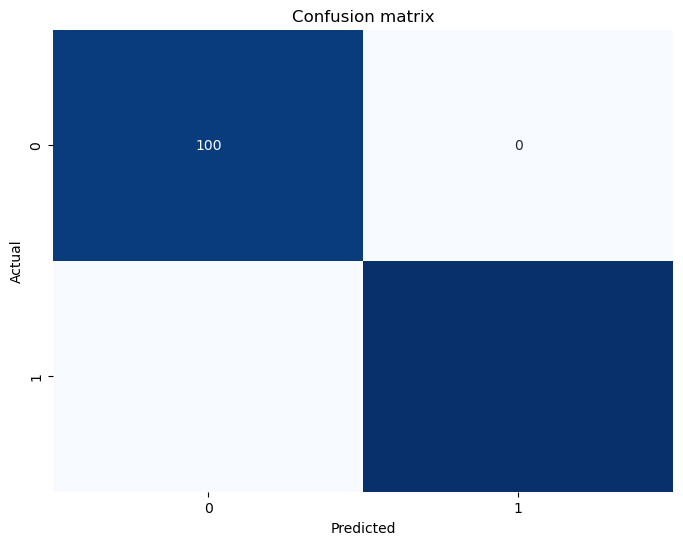

In [28]:
#prediksi label pada data uji menggunakkan model terbaik
y_pred = best_modelETC.predict(X_test)

#hitung confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#buat heatmap dari confusion_maatrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap= 'Blues', cbar=False)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

Algoritma Random Forest Classifier

Berikut adalah beberapa alasan yang mendasari saya memilih Random Forest Classifier :

Ensemble Learning: RandomForestClassifier adalah bagian dari kelas algoritma ensemble learning yang kuat. Ini berarti algoritma ini menggabungkan prediksi dari beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

Kemampuan Handle Fitur Numerik dan Kategorikal: RandomForestClassifier dapat menangani baik fitur-fitur numerik maupun kategorikal dalam dataset Anda tanpa memerlukan banyak preprocessing tambahan. Ini menghemat waktu dan upaya dalam persiapan data.

Toleran terhadap Outliers: Algoritma Random Forest cenderung lebih toleran terhadap pencilan (outliers) dalam data daripada beberapa algoritma lainnya. Hal ini berguna jika dataset Anda memiliki beberapa nilai yang ekstrem atau tidak biasa.

In [29]:
#Membangun model klasifikasi Random Forest Classifier¶


In [30]:
#menginisialisai Random Forest Classifier model
modelRFC = RandomForestClassifier()

#melatih model menggunakkan data training
modelRFC.fit(X_train, y_train)

#memprediksi label pada data testing
y_pred = modelRFC.predict(X_test)

#mengevaluasi model menggunakkan classification report, accuracy, dan MSE

report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
loss = mean_squared_error(y_test, y_pred)

#menampilkan hasil evaluasi classifacaction report and accuracy
print("Classification Report \n:", report)
print("Accuracy", accuracy)
print("Loss:", loss)

Classification Report 
:               precision    recall  f1-score   support

           0       1.00      0.94      0.97       100
           1       0.95      1.00      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205

Accuracy 0.9707317073170731
Loss: 0.02926829268292683


In [31]:
#prediksi label pada data validasi 
y_pre_valid = modelRFC.predict(X_valid)

#mengevaluasi model menggunakkan classification report, accuracy dan MSE
report = classification_report(y_valid, y_pre_valid)
accuracy = accuracy_score(y_valid, y_pre_valid)
loss = mean_squared_error(y_valid, y_pre_valid)

# Menampilkan hasil evaluasi classification report and accuracy
print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Loss:", loss)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.95      1.00      0.98        84

    accuracy                           0.98       164
   macro avg       0.98      0.97      0.98       164
weighted avg       0.98      0.98      0.98       164

Accuracy: 0.975609756097561
Loss: 0.024390243902439025


In [32]:
#Melakukan cross validation pada model yang telah dibangun
def cross_validation (mode):
    Model = model
    recall = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='recall')
    precision = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='precision')
    f1 = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='f1')
    accuracy = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='accuracy')
    print(f'CV Accuracy Score: {accuracy}')
    print(f'CV Precision Score: {precision}')
    print(f'CV Recall Score: {recall}')
    print(f'CV F1 Score: {f1}')
    print()
    print(f'CV Accuracy Mean: {round(accuracy.mean(), 4)}')
    print(f'CV Precision Mean: {round(precision.mean(), 4)}')
    print(f'CV Recall Mean: {round(recall.mean(), 4)}')
    print(f'CV F1 Mean: {round(f1.mean(), 4)}')

cross_validate(modelRFC)

CV Accuracy Score: [0.96341463 0.98170732 0.99390244 0.98170732 1.        ]
CV Precision Score: [0.95348837 0.96551724 0.98823529 1.         1.        ]
CV Recall Score: [0.97619048 1.         1.         0.96428571 1.        ]
CV F1 Score: [0.96470588 0.98823529 0.99408284 0.99401198 1.        ]

CV Accuracy Mean: 0.9841
CV Precision Mean: 0.9814
CV Recall Mean: 0.9881
CV F1 Mean: 0.9882


In [33]:
#Learning curve model selama pelatihan


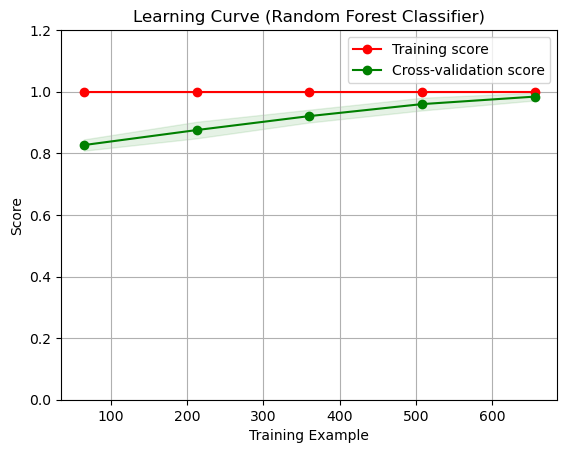

In [34]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Example')
    plt.ylabel('Score')

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.ylim(0, 1.2)  # Set the y-axis limits from 0 to 1

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(modelRFC, "Learning Curve (Random Forest Classifier)", X_train_lengkap, y_train_lengkap, cv=5)
plt.show()



In [39]:
#Melakukan optimasi hyperparameter pada model menggunakan Grid Search CV
#define the parameter grid for grid search
param_grid = {
    'n_estimators' : [300, 400, 500],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap' : [True, False]
    
}

#initialisaze GridSearchCV with the specified  parameters
grid_search = GridSearchCV(estimator = modelRFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#fit the GridSearchCV with the specified parameters
grid_search.fit(X_train_lengkap, y_train_lengkap)

# Print the best parameters and best score found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.9865853658536585


Saya menggunakan GridSearchCV untuk mencari hyperparameter terbaik untuk model RandomForestClassifier (modelRFC) menggunakan parameter grid yang saya tentukan. Parameter grid tersebut mencakup beberapa hyperparameter yang akan dioptimalkan oleh GridSearchCV, yaitu:

'n_estimators': Jumlah pohon dalam ensemble. Nilai yang diuji adalah 300, 400, dan 500.
'max_depth': Kedalaman maksimum dari setiap pohon. Nilai yang diuji adalah None (tidak ada batasan kedalaman), 5, dan 10.
'min_samples_split': Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 5, dan 10.
'min_samples_leaf': Jumlah sampel minimum yang diperlukan untuk menjadi simpul daun (leaf node). Nilai yang diuji adalah 1, 2, dan 4.
'bootstrap': Menentukan apakah akan menggunakan teknik bootstrapping saat membangun pohon atau tidak. Nilai yang diuji adalah True (gunakan bootstrapping) dan False (tidak menggunakan bootstrapping).

In [40]:
#Mengevaluasi model yang telah dioptimasi dengan metric evaluation berupa accuracy, precision, recall, f1-score

# Inisialisasi model Extra Trees Classifier dengan parameter terbaik dari GridSearchCV
best_modelRFC = RandomForestClassifier(**grid_search.best_params_)

# Latih model dengan data latih penuh (X_train_full, y_train_full)
best_modelRFC.fit(X_train_lengkap, y_train_lengkap)

# Prediksi label pada data uji
y_pred = best_modelRFC.predict(X_test)

# Evaluasi model menggunakan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


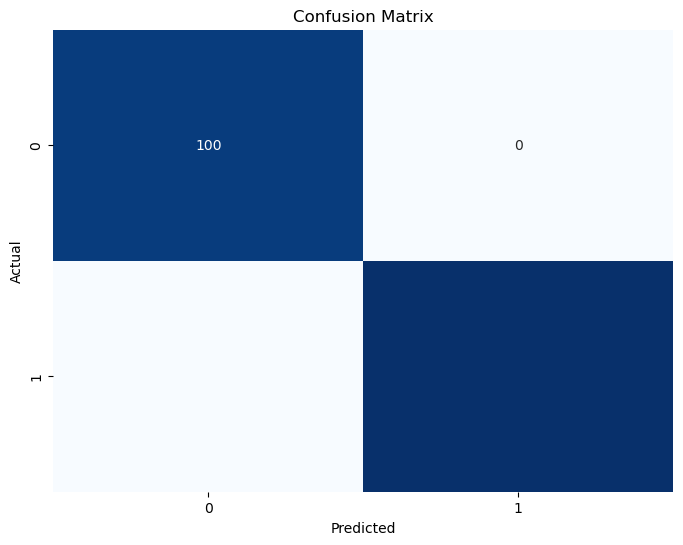

In [70]:
# Prediksi label pada data uji menggunakan model terbaik
y_pred = best_modelRFC.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Algoritma Decision Tree Classifier


Berikut adalah beberapa alasan yang mendasari saya memilih Decision Tree Classifier :

Handle Fitur Numerik dan Kategorikal: Decision trees dapat menangani baik fitur numerik maupun kategorikal tanpa memerlukan banyak preprocessing. Ini menghemat waktu dan upaya dalam persiapan data.

Toleran terhadap Outliers: Decision trees cenderung lebih toleran terhadap pencilan (outliers) dalam data daripada beberapa algoritma lainnya.

Fitur Importance Otomatis: Decision trees secara otomatis menghitung pentingnya fitur (feature importance) dalam membuat prediksi. Ini memberikan wawasan yang berharga tentang faktor-faktor yang paling berpengaruh dalam menentukan klasifikasi target.

In [71]:
#Membangun model klasifikasi Decision Tree Classifier

In [73]:
#menginisialisasi decision tree classifier model
modelDTC = DecisionTreeClassifier()

#melatih model menggunakkan data training
modelDTC.fit(X_train, y_train)

#memprediksi label pada data testing
y_pred = modelDTC.predict(X_test)

#mengevaluasi ,model menggunakkan classification report, accuracy dan MSE
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
loss = mean_squared_error(y_test, y_pred)

#menampilkan hasil evaluasi classification report dan accuracy
print("Classification report:", report)
print("Accuracy :", accuracy)
print("Loss:", loss)

Classification report:               precision    recall  f1-score   support

           0       0.93      1.00      0.96       100
           1       1.00      0.92      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Accuracy : 0.9609756097560975
Loss: 0.03902439024390244


In [74]:
#Mengevaluasi model yang dihasilkan dengan data validasi
y_pred_valid = modelDTC.predict(X_valid)

#mengevaluasi model menggunakkan classification raeport, accuraccy dan MSE
# Mengevaluasi model menggunakan classification report, accuracy dan MSE
report = classification_report(y_valid, y_pred_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
loss = mean_squared_error(y_valid, y_pred_valid)

# Menampilkan hasil evaluasi classification report and accuracy
print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Loss:", loss)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        80
           1       1.00      0.92      0.96        84

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164

Accuracy: 0.9573170731707317
Loss: 0.042682926829268296


In [77]:
def cross_validate(model):
    Model = model
    recall = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='recall')
    precision = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='precision')
    f1 = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='f1')
    accuracy = cross_val_score(Model, X_train_lengkap, y_train_lengkap, cv=5, scoring='accuracy')
    print(f'CV Accuracy Score: {accuracy}')
    print(f'CV Precision Score: {precision}')
    print(f'CV Recall Score: {recall}')
    print(f'CV F1 Score: {f1}')
    print()
    print(f'CV Accuracy Mean: {round(accuracy.mean(), 4)}')
    print(f'CV Precision Mean: {round(precision.mean(), 4)}')
    print(f'CV Recall Mean: {round(recall.mean(), 4)}')
    print(f'CV F1 Mean: {round(f1.mean(), 4)}')

cross_validate(modelDTC)

CV Accuracy Score: [0.98170732 0.98780488 0.98780488 0.9695122  1.        ]
CV Precision Score: [1.         0.98823529 0.97674419 0.97590361 1.        ]
CV Recall Score: [0.97619048 1.         1.         0.96428571 1.        ]
CV F1 Score: [0.98795181 0.99408284 0.98823529 0.97005988 1.        ]

CV Accuracy Mean: 0.9854
CV Precision Mean: 0.9882
CV Recall Mean: 0.9881
CV F1 Mean: 0.9881


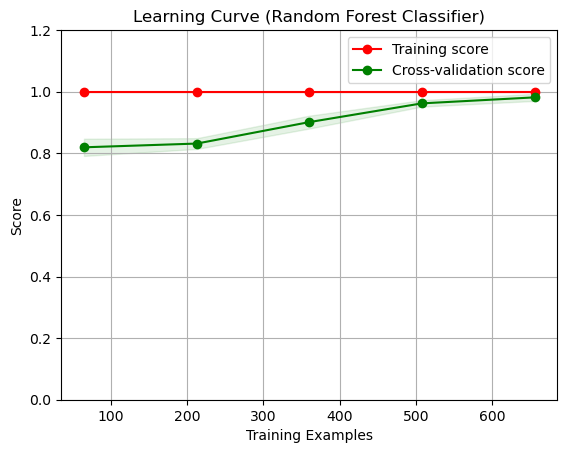

In [80]:
#Learning curve model selama pelatihan
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.ylim(0, 1.2)  # Set the y-axis limits from 0 to 1

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(modelDTC, "Learning Curve (Random Forest Classifier)", X_train_lengkap, y_train_lengkap, cv=5)
plt.show()    

In [81]:
#Melakukan optimasi hyperparameter pada model menggunakan Grid Search CV
param_grid={
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

#initializase GridSearchCV with the specified parameters
grid_search = GridSearchCV(estimator=modelDTC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#fit the gridsearchcv to the training data to find best parameters
grid_search.fit(X_train_lengkap, y_train_lengkap)

#print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9865853658536585


Hyperparameter yang saya ambil untuk dicari nilai terbaiknya menggunakan GridSearchCV dengan DecisionTreeClassifier adalah:

'max_depth': Kedalaman maksimum dari setiap pohon keputusan. Nilai yang diuji adalah None (tidak ada batasan kedalaman), 5, dan 10.
'min_samples_split': Jumlah sampel minimum yang diperlukan untuk membagi simpul internal. Nilai yang diuji adalah 2, 5, dan 10.
'min_samples_leaf': Jumlah sampel minimum yang diperlukan untuk menjadi simpul daun (leaf node). Nilai yang diuji adalah 1, 2, dan 4.

In [84]:
#Mengevaluasi model yang telah dioptimasi dengan metric evaluation berupa accuracy, precision, recall, f1-score¶


#inisialisasi model Decision Trees Classifier
best_modelDTC = ExtraTreesClassifier(**grid_search.best_params_)

# Latih model dengan data latih penuh (X_train_full, y_train_full)
best_modelDTC.fit(X_train_lengkap, y_train_lengkap)

# Prediksi label pada data uji
y_pred = best_modelDTC.predict(X_test)

# Evaluasi model menggunakan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


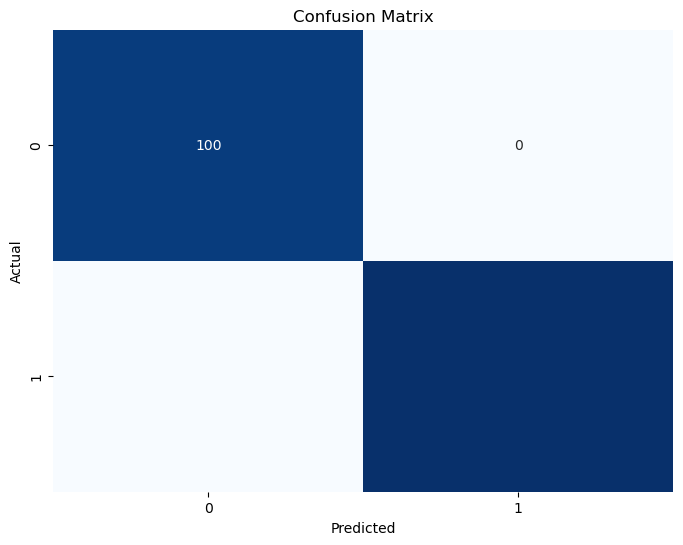

In [85]:
# Prediksi label pada data uji menggunakan model terbaik
y_pred = best_modelDTC.predict(X_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Shape of your Data Set loaded: (1025, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################
To fix these data quali

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,13,29.000000,77.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
cp,int64,0.000000,1,0.000000,3.000000,No issue
trestbps,int64,0.000000,16,94.000000,200.000000,Column has 9 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
chol,int64,0.000000,50,126.000000,564.000000,Column has 5 outliers greater than upper bound (370.38) or lower than lower bound(115.38). Cap them or remove them.
fbs,int64,0.000000,0,0.000000,1.000000,No issue
restecg,int64,0.000000,0,0.000000,2.000000,No issue
thalach,int64,0.000000,30,71.000000,202.000000,Column has 1 outliers greater than upper bound (215.12) or lower than lower bound(84.12). Cap them or remove them.
exang,int64,0.000000,0,0.000000,1.000000,No issue
oldpeak,float64,0.000000,NA,0.000000,6.200000,Column has 5 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.


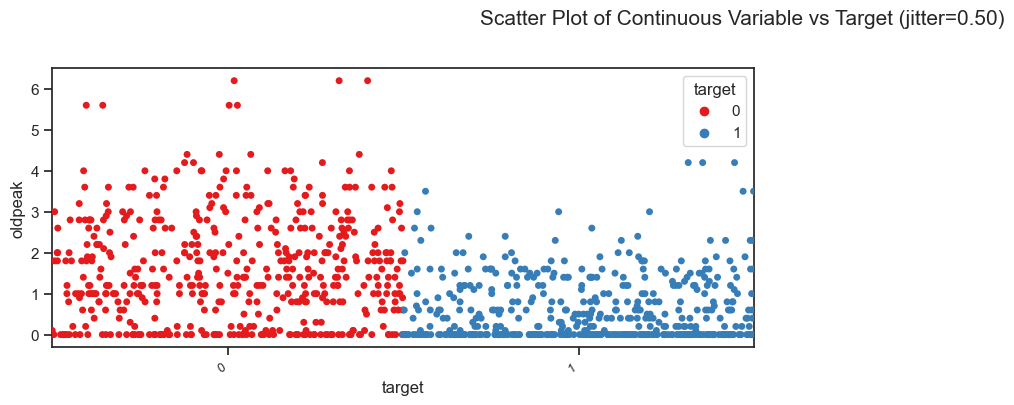

Could not draw some Distribution Plots 'numpy.int64' object has no attribute 'startswith'


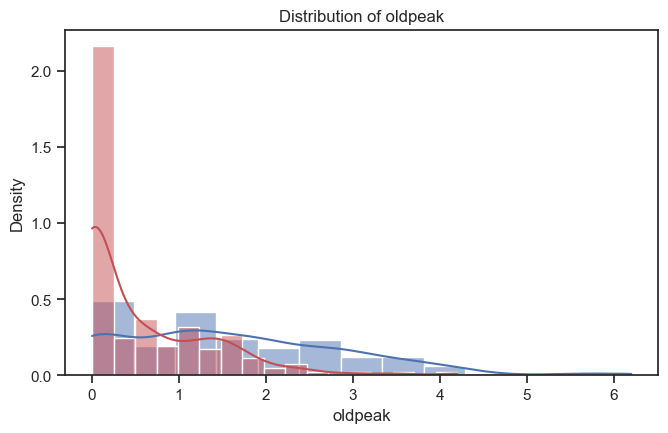

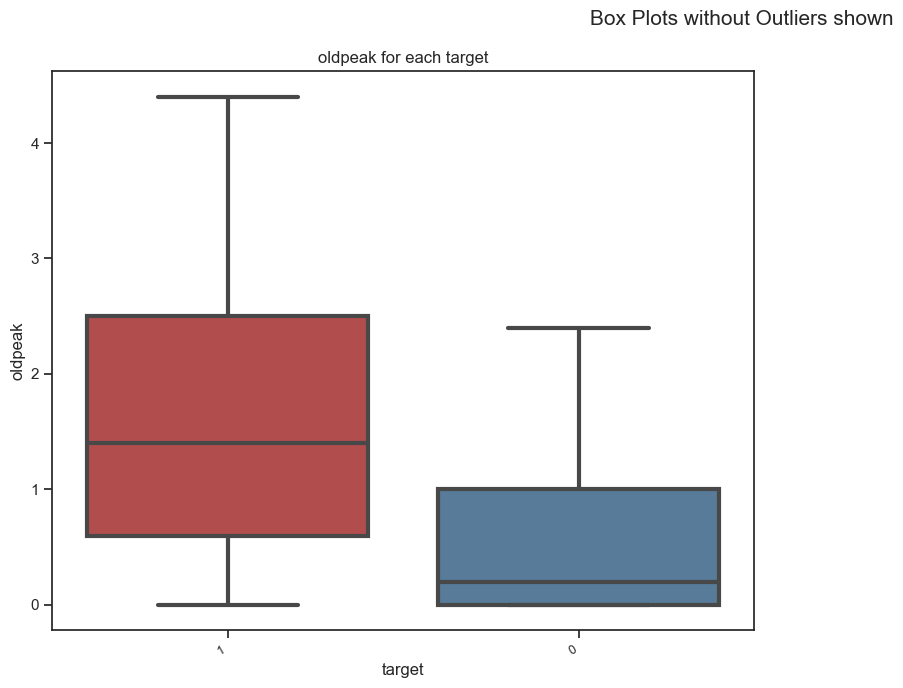

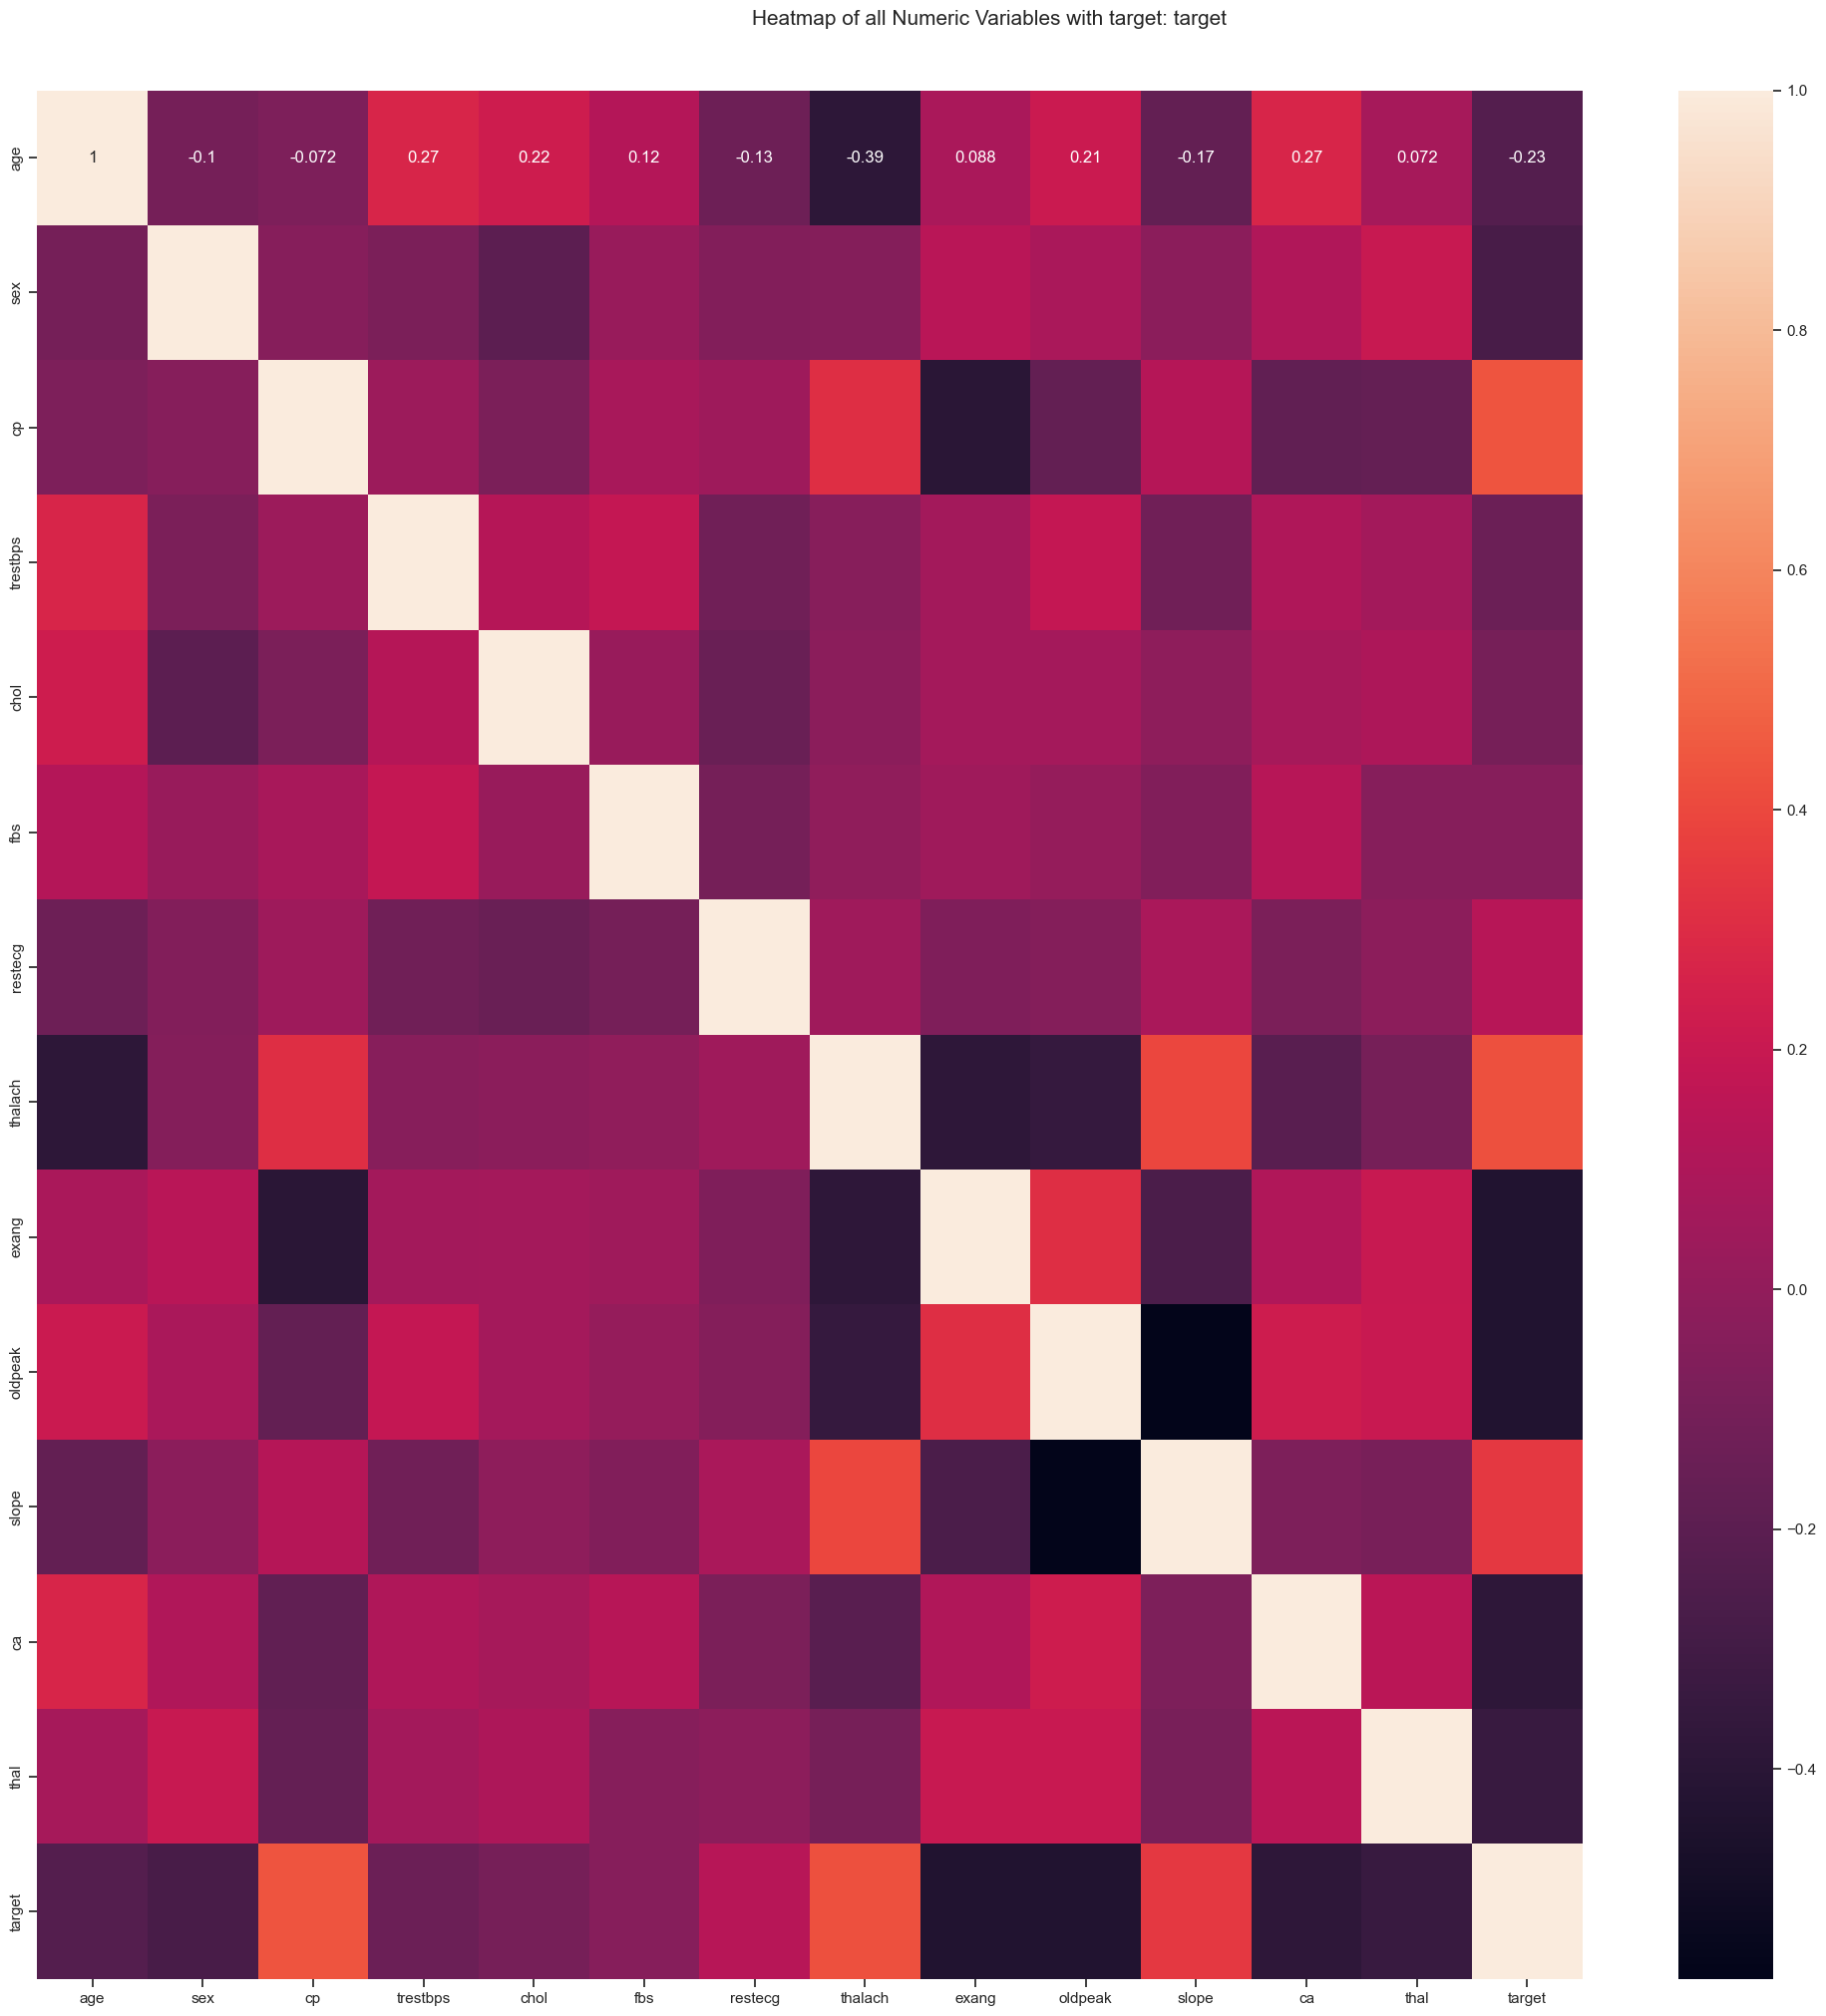

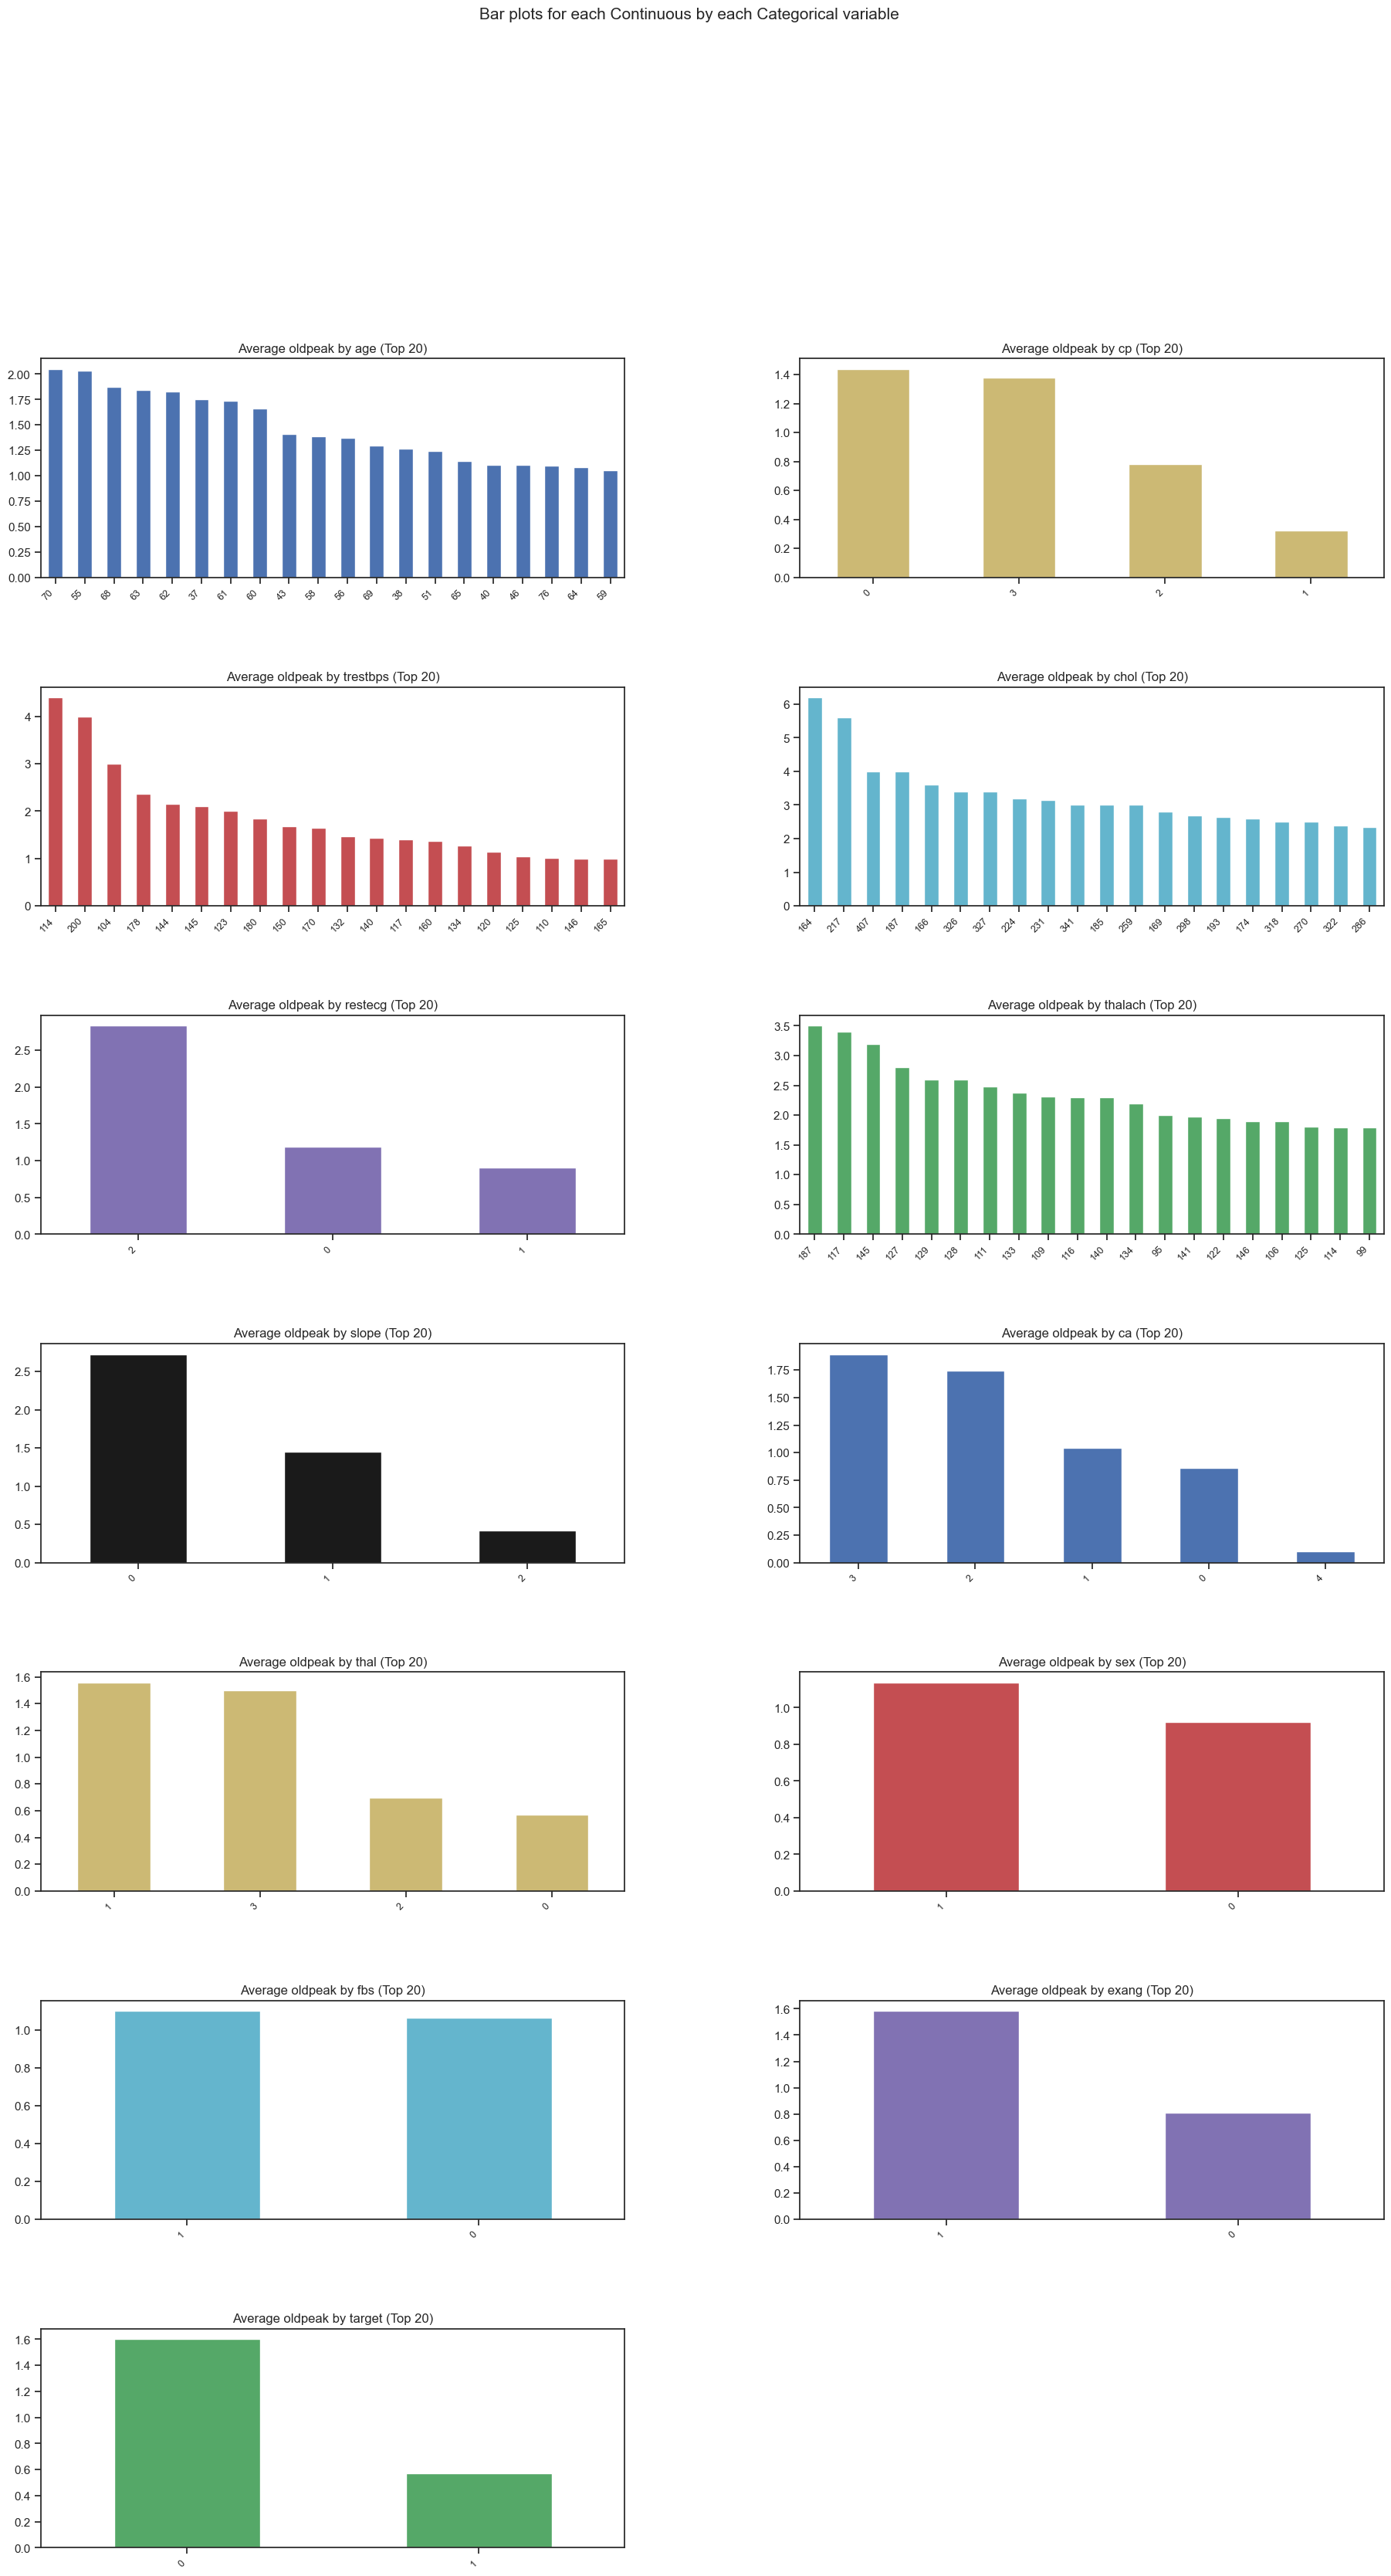

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [89]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
# specify the target column name in depVar (for e.g. here dependent variable is medical charges for the analysis)
dft = AV.AutoViz('heart.csv', depVar = 'target')